In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [7]:
df = pd.read_csv('data/cleaned-premier-league-data.csv')
df

,date,home_team,away_team,home_outcome,avg_odd_home_win,avg_odd_draw,avg_odd_away_win,home_ranking,away_ranking,last_home_result,last_away_result
0,08/08/2015,2,1,0,7.024,3.303,3.748,20,17,0,0
1,08/08/2015,6,22,1,6.697,4.338,8.967,1,8,0,0
2,08/08/2015,8,24,1,6.842,3.514,4.852,11,20,0,0
3,08/08/2015,12,21,2,7.000,3.207,3.742,14,16,0,0
4,08/08/2015,15,23,2,6.477,3.651,5.318,4,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1241,12/05/2019,13,27,2,6.619,8.266,8.563,4,20,1,1
1242,12/05/2019,15,5,0,6.563,8.631,8.438,2,20,0,-1
1243,12/05/2019,19,10,1,6.204,7.470,6.521,17,16,-1,0
1244,12/05/2019,23,8,1,6.153,6.795,3.233,3,8,-1,1


In [28]:
df.shape


(1246, 11)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              1246 non-null   object 
 1   home_team         1246 non-null   int64  
 2   away_team         1246 non-null   int64  
 3   home_outcome      1246 non-null   int64  
 4   avg_odd_home_win  1246 non-null   float64
 5   avg_odd_draw      1246 non-null   float64
 6   avg_odd_away_win  1246 non-null   float64
 7   home_ranking      1246 non-null   int64  
 8   away_ranking      1246 non-null   int64  
 9   last_home_result  1246 non-null   int64  
 10  last_away_result  1246 non-null   int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 107.2+ KB


In [31]:
df.describe()

,home_team,away_team,home_outcome,avg_odd_home_win,avg_odd_draw,avg_odd_away_win,home_ranking,away_ranking,last_home_result,last_away_result
count,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000
mean,13.856340,13.745586,1.133226,7.274838,4.441469,3.684693,11.274478,10.603531,-0.089888,0.072231
std,8.224427,8.194932,0.851120,1.043937,1.647506,1.604586,5.768083,5.902701,0.851143,0.860326
min,0.000000,0.000000,0.000000,5.463000,2.935000,2.005000,1.000000,1.000000,-1.000000,-1.000000
25%,7.000000,7.000000,0.000000,6.492000,3.250000,2.544750,7.000000,6.000000,-1.000000,-1.000000
50%,14.000000,14.000000,1.000000,7.056000,3.535000,3.197000,11.000000,10.000000,0.000000,0.000000
75%,21.000000,21.000000,2.000000,7.885250,6.383250,4.292000,16.000000,15.000000,1.000000,1.000000
max,27.000000,27.000000,2.000000,10.355000,9.088000,9.057000,20.000000,20.000000,1.000000,1.000000


In [ ]:
# Finding the mean of all columns
column_means = df.mean(numeric_only=True)
print(column_means)

home_team           13.856340
away_team           13.745586
home_outcome         1.133226
avg_odd_home_win     7.274838
avg_odd_draw         4.441469
avg_odd_away_win     3.684693
home_ranking        11.274478
away_ranking        10.603531
last_home_result    -0.089888
last_away_result     0.072231
dtype: float64


In [ ]:
# Finding the median of all columns
column_medians = df.median(numeric_only=True)
print(column_medians)

home_team           14.000
away_team           14.000
home_outcome         1.000
avg_odd_home_win     7.056
avg_odd_draw         3.535
avg_odd_away_win     3.197
home_ranking        11.000
away_ranking        10.000
last_home_result     0.000
last_away_result     0.000
dtype: float64


In [39]:
# Calculate the mode (most frequent value) for each column and select the first mode in case of multiple
single_mode = df.mode().iloc[0]
print(single_mode)

date                12/05/2019
home_team                  8.0
away_team                  8.0
home_outcome               2.0
avg_odd_home_win         6.515
avg_odd_draw             3.172
avg_odd_away_win         2.085
home_ranking              20.0
away_ranking              20.0
last_home_result          -1.0
last_away_result           1.0
Name: 0, dtype: object


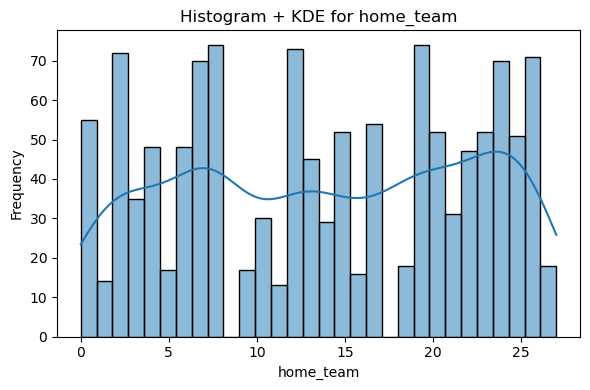

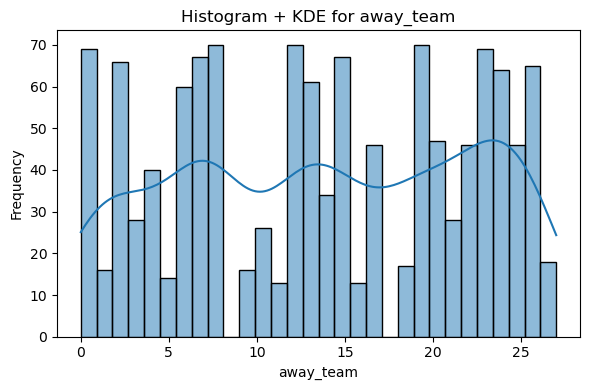

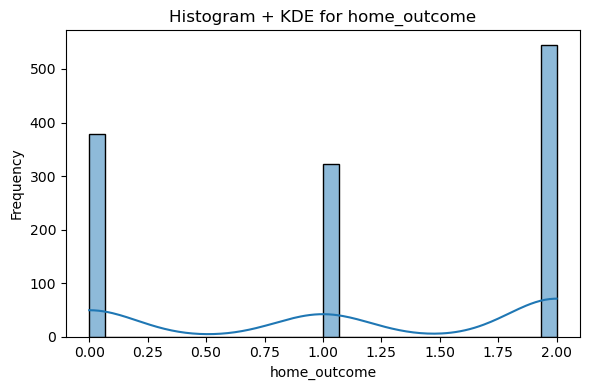

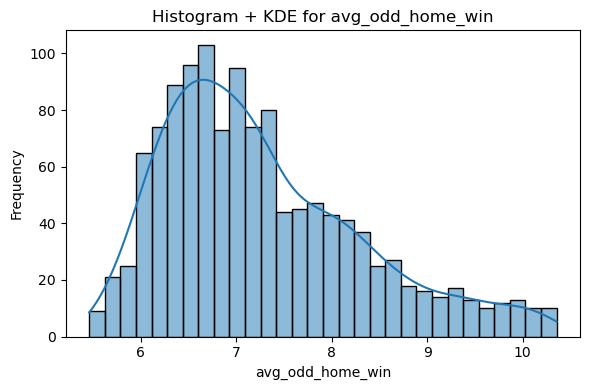

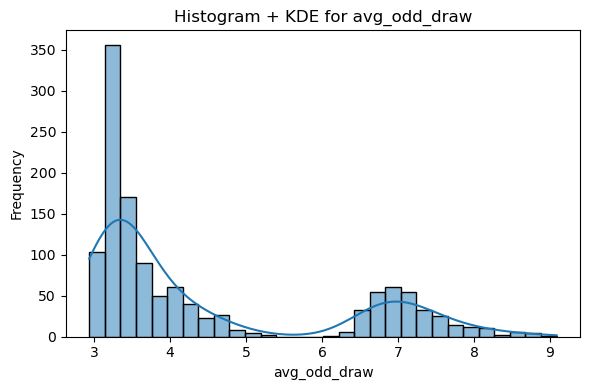

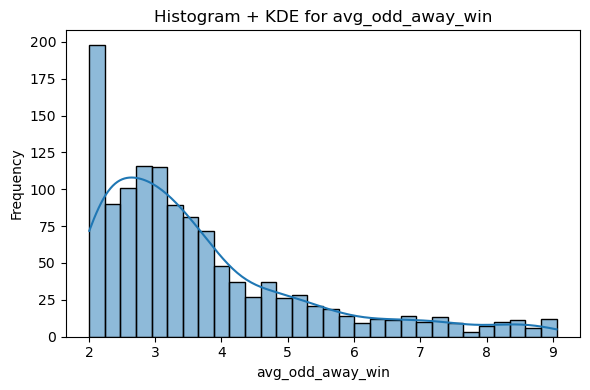

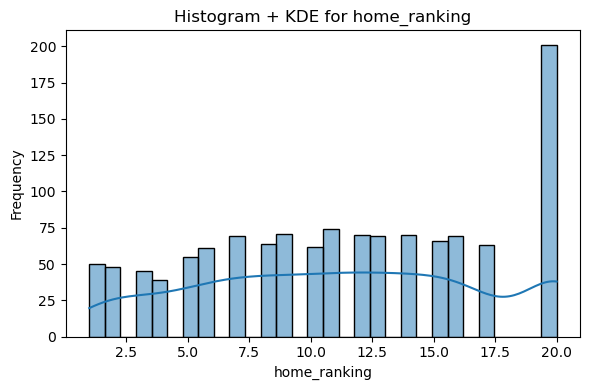

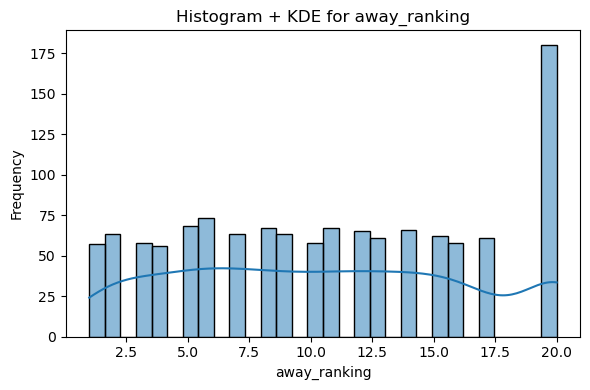

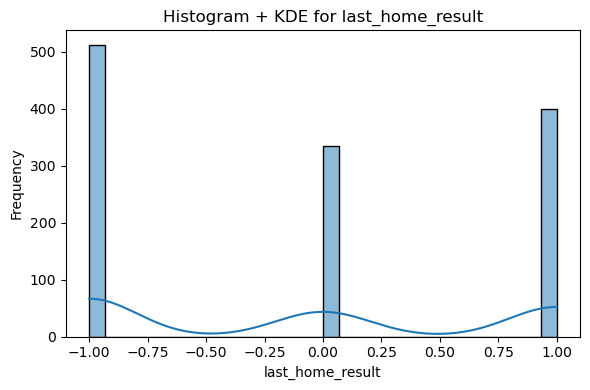

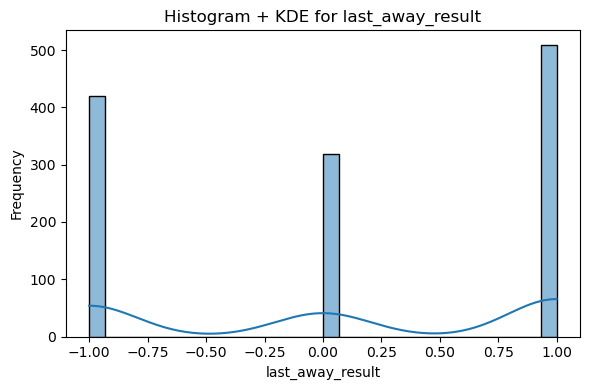

In [ ]:
# 📊 Histogram and kde for all columns

for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Histogram + KDE for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    
# KDE helps to visualize the distribution of data points in a continuous variable

In [11]:
df['home_ranking'].value_counts().sort_index()

home_ranking
1      50
2      48
3      45
4      39
5      55
6      61
7      69
8      64
9      71
10     62
11     74
12     70
13     69
14     70
15     66
16     69
17     63
20    201
Name: count, dtype: int64

In [13]:
df['away_ranking'].value_counts().sort_index()

away_ranking
1      57
2      63
3      58
4      56
5      68
6      73
7      63
8      67
9      63
10     58
11     67
12     65
13     61
14     66
15     62
16     58
17     61
20    180
Name: count, dtype: int64

looks like they have been an error with team ranking 18-19 that might have been combined into 20 which would explain why it is so much larger then the others

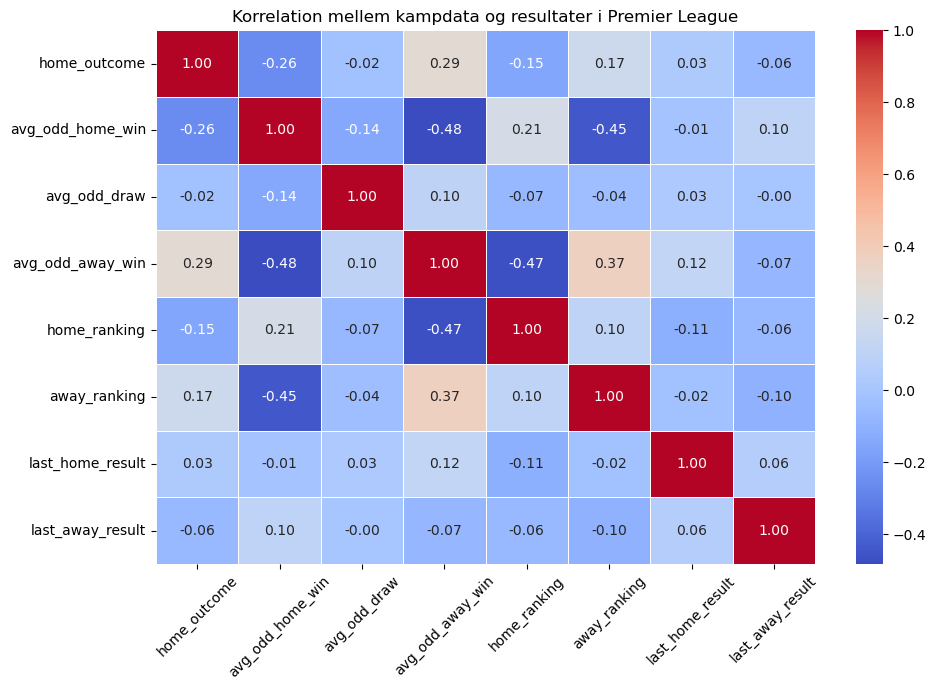

In [16]:
# drop columns that are not needed for correlation analysis
only_numerical_df = df.drop (columns=['date', 'home_team', 'away_team']) 

corr = only_numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korrelation mellem kampdata og resultater i Premier League')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- `home_outcome` has a clear negative correlation with `avg_odd_home_win` and a positive correlation with `avg_odd_away_win` – in other words:  
  **The lower the odds for the home team, the more likely they are to win.**

- `home_ranking` and `away_ranking` also correlate with `home_outcome`, suggesting that **ranking has an impact on the result**.

- `last_home_result` and `last_away_result` show a **weak correlation** with the outcome, indicating that **previous match results may have a small effect**.


In [19]:
# Keep only numeric columns for PCA
numeric_df = df.select_dtypes(include='number')

# Fit PCA on numeric data
pca = PCA()
pca_data = pca.fit_transform(numeric_df)

pca_data

array([[ 1.33813776e-02, -1.61483509e+01,  1.22342453e+01, ...,
         5.39933410e-01, -1.73384479e-01, -1.07728733e+00],
       [-1.16575841e+01, -1.38417006e-01, -8.37577828e+00, ...,
         1.17076372e+00, -8.70547663e-01, -3.50068208e-01],
       [-1.14732076e+01,  4.38058630e+00,  6.81024846e+00, ...,
         3.25834861e-01, -2.79054230e-02, -1.21148795e-01],
       ...,
       [ 6.24411826e+00,  1.44983906e+00,  7.68488903e+00, ...,
         5.34703809e-01, -1.31707898e+00, -2.43219362e-01],
       [ 1.04661081e+01,  1.15474065e+00, -7.27100082e+00, ...,
        -1.07292963e+00, -9.66096694e-01, -5.27646799e-01],
       [-8.64726571e-01,  1.60679631e+01,  1.81722873e+00, ...,
        -6.79078837e-01, -1.17315106e+00, -1.14128487e+00]])

In [20]:
# The PCA class contains explained variance  ratio, 
# which returns the variance caused by each of the principal components
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([0.33368611, 0.30594859, 0.17699298, 0.15031678, 0.01273802,
       0.00742954, 0.0037503 , 0.0032098 , 0.00314108, 0.0027868 ])

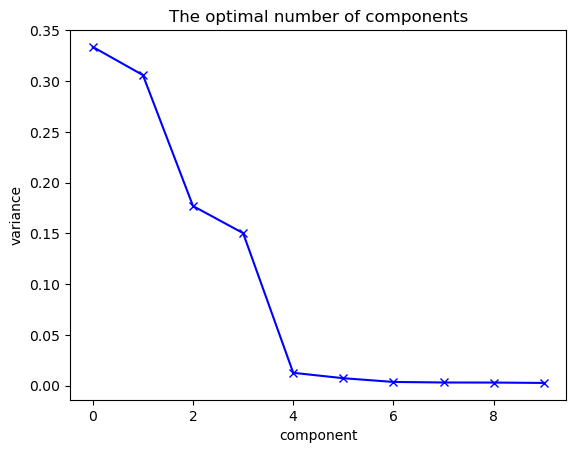

In [22]:
# Plot the explained_variance
plt.plot(explained_variance, 'bx-')
plt.xlabel('component')
plt.ylabel('variance')
plt.title('The optimal number of components')
plt.show()

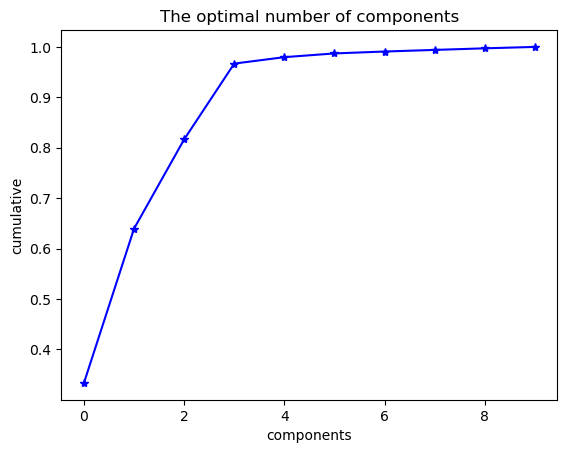

In [25]:
# Plot the cumulative explained_variance
cumulative = np.cumsum(explained_variance)
plt.plot(cumulative, 'b*-')
plt.xlabel('components')
plt.ylabel('cumulative')
plt.title('The optimal number of components')
plt.show()

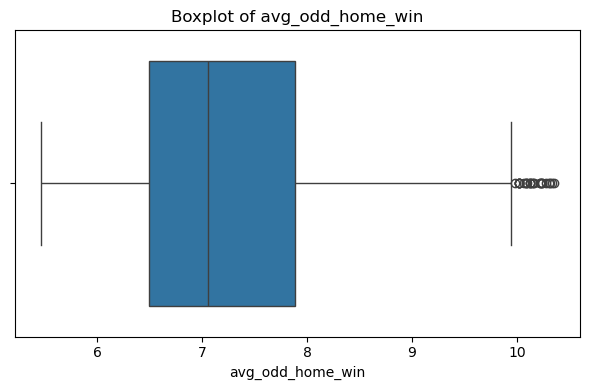

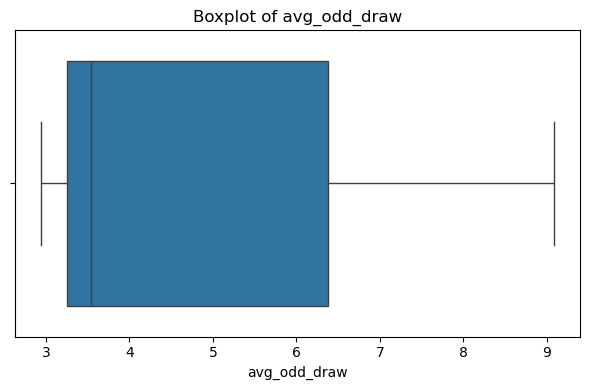

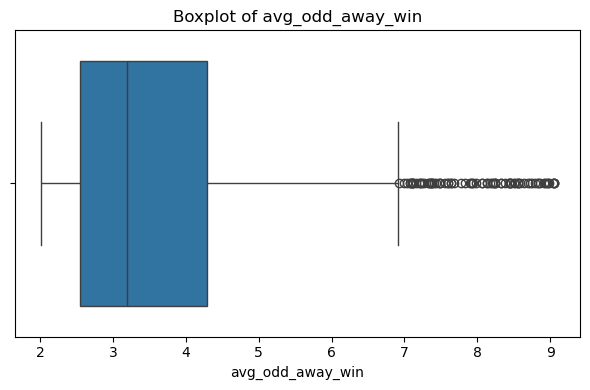

In [11]:
# Boxplots
boxplot_cols = df.drop (columns=['date', 'home_team', 'away_team', 'home_ranking', 'away_ranking','home_outcome','last_home_result', 'last_away_result'])

for col in boxplot_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()
